In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
pd.set_option('display.max_columns', None)

In [127]:
dataset = pd.read_csv('train_bikes.csv' )

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [134]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

In [135]:
dataset.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [136]:
dataset.shape

(10886, 12)

In [137]:
[ (feature, len(dataset[feature].unique())) for feature in dataset.columns ]

[('datetime', 10886),
 ('season', 4),
 ('holiday', 2),
 ('workingday', 2),
 ('weather', 4),
 ('temp', 49),
 ('atemp', 60),
 ('humidity', 89),
 ('windspeed', 28),
 ('casual', 309),
 ('registered', 731),
 ('count', 822)]

In [138]:
categorical_feature = [feature for feature in dataset.columns  if len(dataset[feature].unique())< 5]

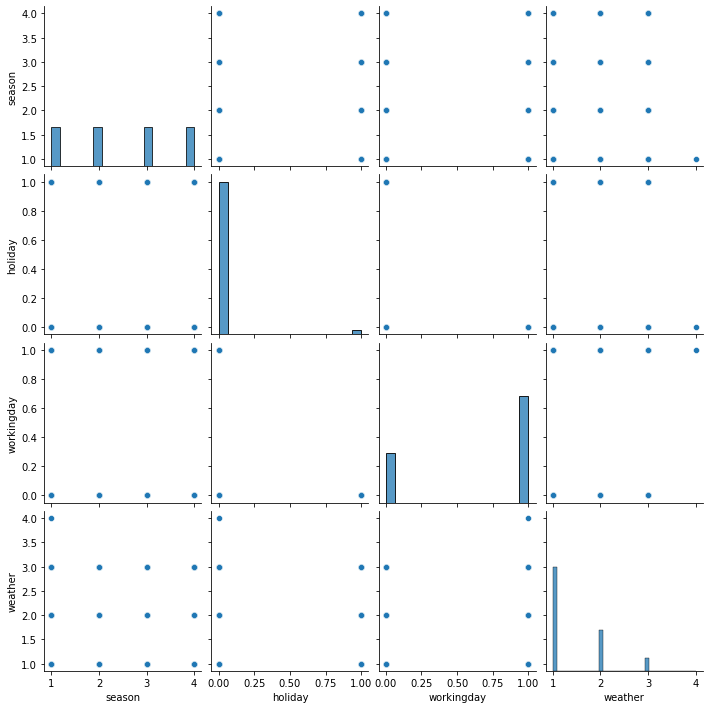

In [139]:
sns.pairplot(dataset[categorical_feature])

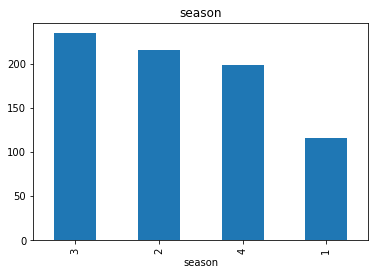

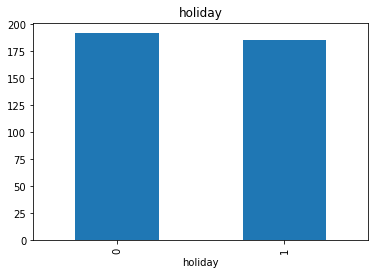

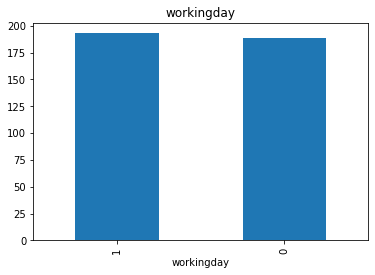

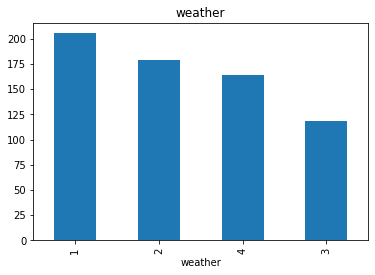

In [140]:
for feature in categorical_feature:
    dataset.groupby(feature)['count'].mean().sort_values(ascending = False).plot.bar()
    plt.title(feature)
    plt.show()

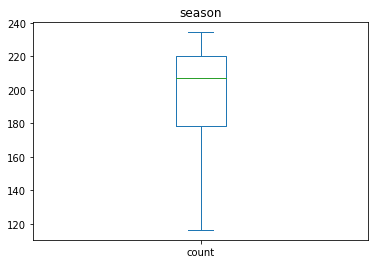

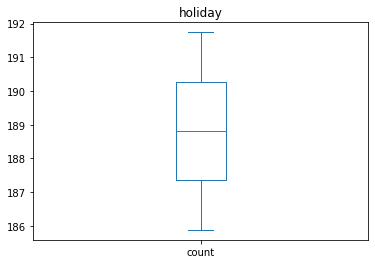

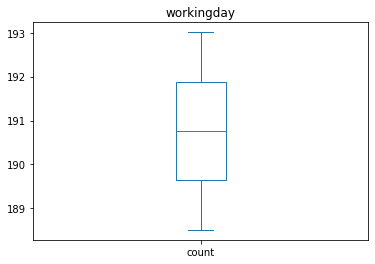

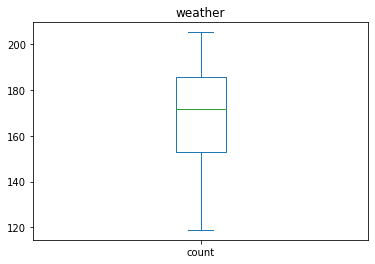

In [141]:
for feature in categorical_feature:
    dataset.groupby(feature)['count'].mean().sort_values(ascending = False).plot.box()
    plt.title(feature)
    plt.show()

In [142]:
numeric_feature = [feature for feature in dataset.columns if feature not in categorical_feature]

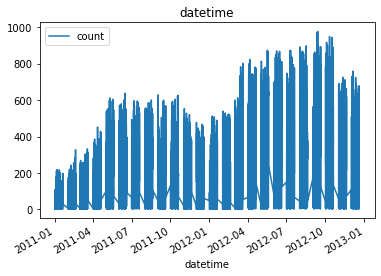

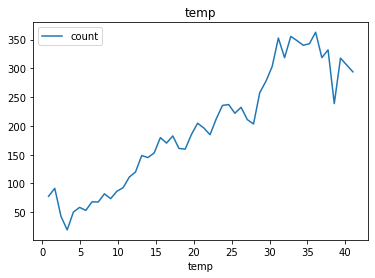

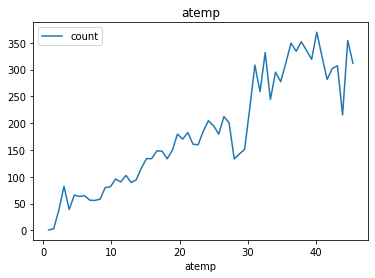

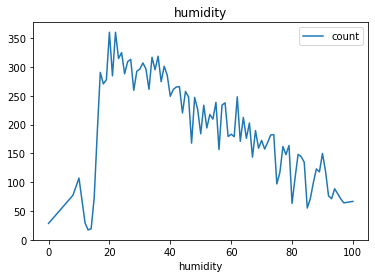

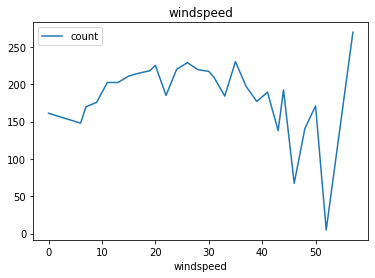

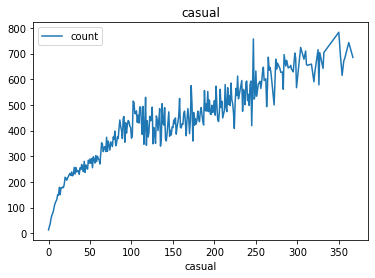

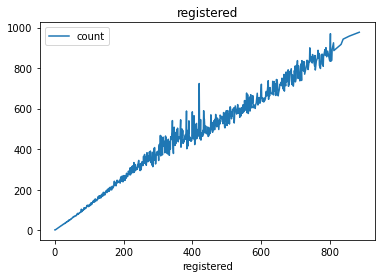

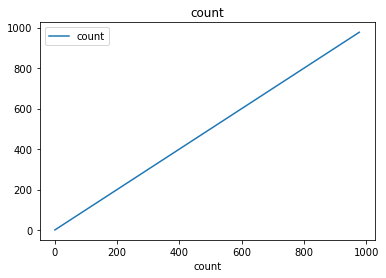

In [143]:
for feature in numeric_feature:
    dataset.groupby(feature)[['count']].mean().plot()
    plt.title(feature)
    plt.show()

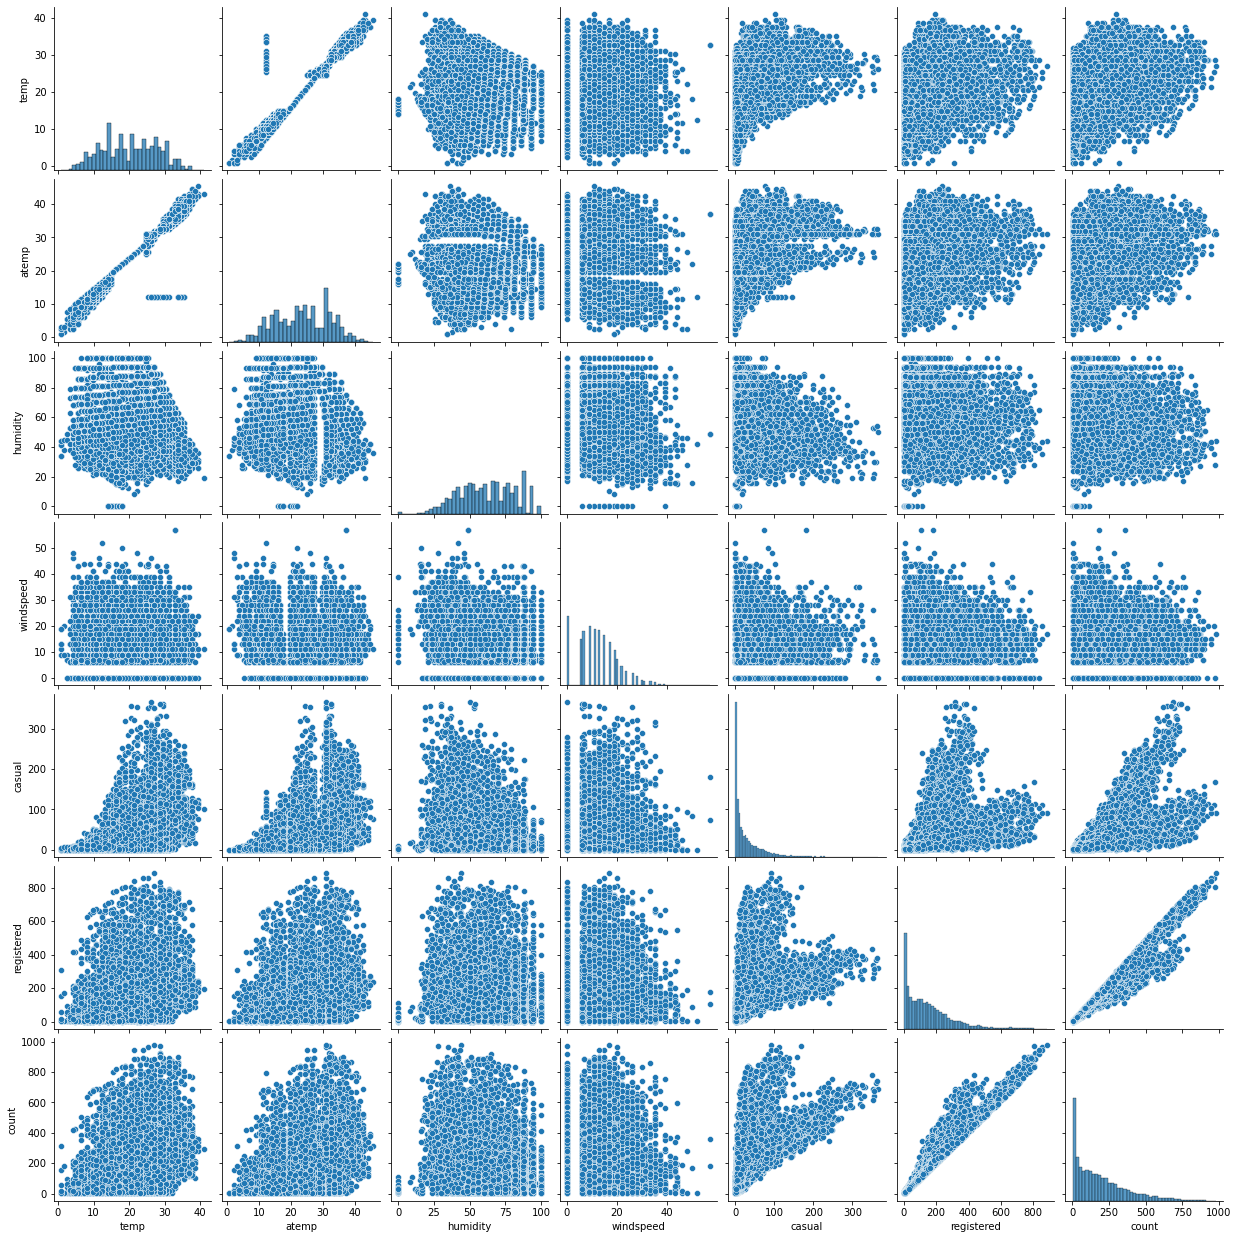

In [144]:
sns.pairplot(dataset[numeric_feature])

In [50]:
import pandas_profiling

In [51]:
dataset.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

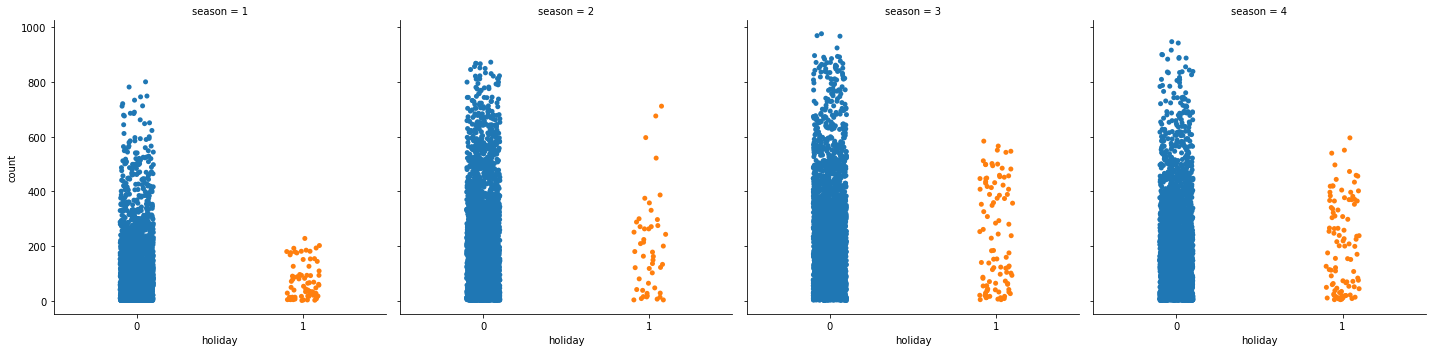

In [58]:
sns.catplot( x = 'holiday', y = 'count', col='season', data = dataset)

In [75]:
dataset['hour'] = dataset['datetime'].astype(str).str.split(" ").str[1].str.split(':').str[0].astype("category")

<AxesSubplot:xlabel='hour', ylabel='count'>

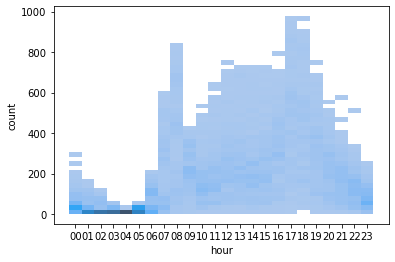

In [76]:
sns.histplot(data = dataset, x = 'hour', y = 'count' )

In [145]:
dataset['year']= dataset['datetime'].astype(str).str.split(" ").str[0].str.split('-').str[0].astype('category')

In [146]:
dataset['day'] = dataset['datetime'].astype(str).str.split(" ").str[0].str.split('-').str[2].astype('category')
dataset['month'] = dataset['datetime'].astype(str).str.split(" ").str[0].str.split('-').str[1].astype('category')

In [147]:
dataset.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year day month  
0        81        0.0       3          13     16  2011  01    01  
1        80        0.0       8          32     40  2011  01    01  
2        80        0.0       5          27     32  2011  01    01  
3        75        0.0       3          10     13  2011  01    01  
4        75        0.0       0           1      1  2011  01    01

C:\Users\431170~1\AppData\Local\Temp/ipykernel_5444/3409559441.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


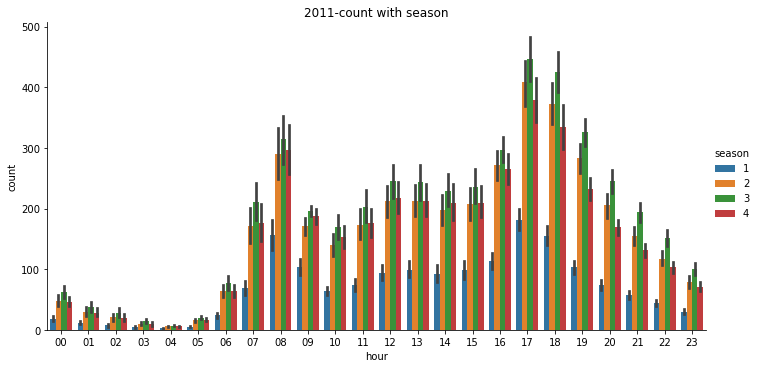

In [114]:
sns.catplot( kind = "bar", x = 'hour', hue = 'season', y = 'count', data = dataset[dataset['year']=='2011'].reset_index(drop= True), height=5, aspect=2)
plt.title('2011-count with season')
plt.show()

C:\Users\431170~1\AppData\Local\Temp/ipykernel_5444/2409503524.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


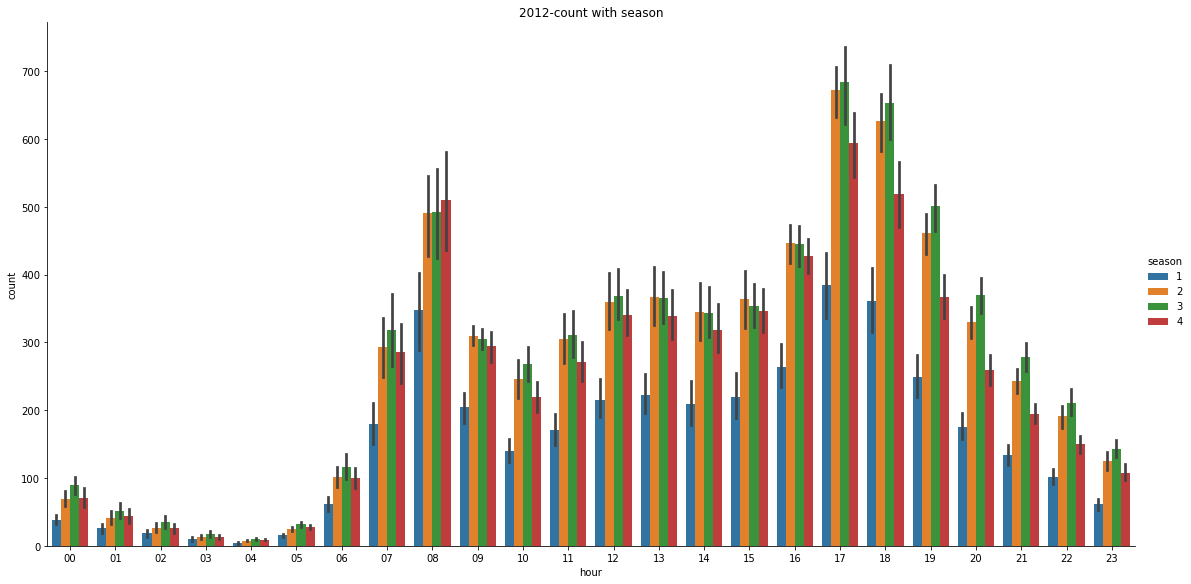

In [113]:
sns.catplot( kind = "bar", x = 'hour', hue = 'season', y = 'count', data = dataset[dataset['year']=='2012'].reset_index(drop= True), height=8, aspect=2)
plt.title('2012-count with season')
plt.show()

In [107]:
dataset[dataset['year']=='2011'].reset_index(drop= True)

datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1    2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2    2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3    2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4    2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
...                  ...     ...      ...         ...      ...    ...     ...   
5417 2011-12-19 19:00:00       4        0           1        2  14.76  17.425   
5418 2011-12-19 20:00:00       4        0           1        1  16.40  20.455   
5419 2011-12-19 21:00:00       4        0           1        2  14.76  17.425   
5420 2011-12-19 22:00:00       4        0           1        2  14.76  17.425   
5421 2011-12-19 23:00:00       4        0           1        1  14.76  17.425   

      humidity  windspeed  casual  registered  count hour  year day month  
0           81     0.0000       3          13     16   00  2011  01    01  
1           80     0.0000       8          32     40   01  2011  01    01  
2           80     0.0000       5          27     32   02  2011  01    01  
3           75     0.0000       3          10     13   03  2011  01    01  
4           75     0.0000       0           1      1   04  2011  01    01  
...        ...        ...     ...         ...    ...  ...   ...  ..   ...  
5417        53    11.0014      17         234    251   19  2011  19    12  
5418        40    11.0014       9         197    206   20  2011  19    12  
5419        53     8.9981      15         112    127   21  2011  19    12  
5420        57    11.0014      12          95    107   22  2011  19    12  
5421        53    11.0014      10          50     60   23  2011  19    12  

[5422 rows x 16 columns]

In [106]:
dataset['year'].unique()

['2011', '2012']
Categories (2, object): ['2011', '2012']

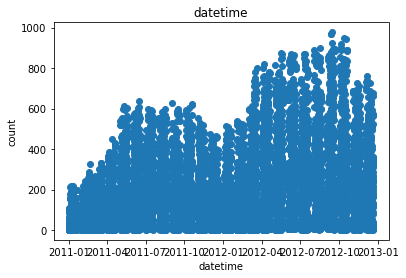

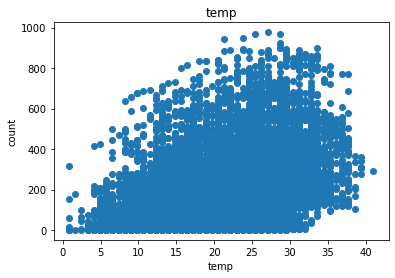

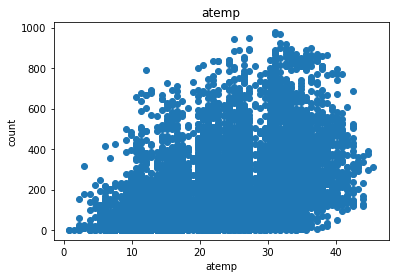

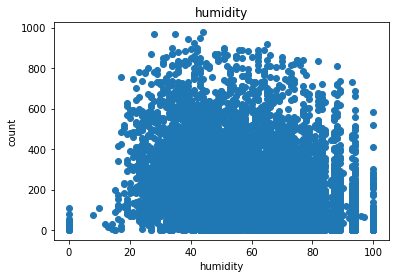

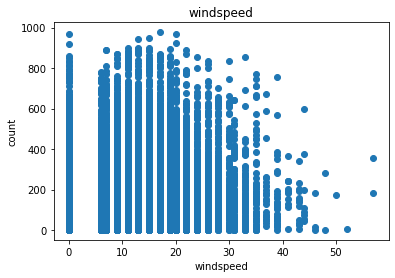

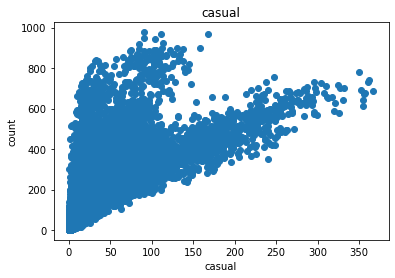

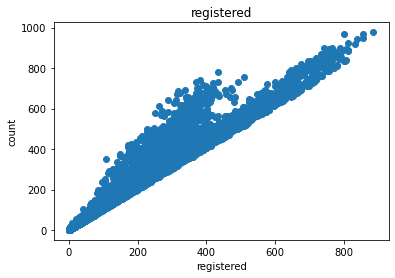

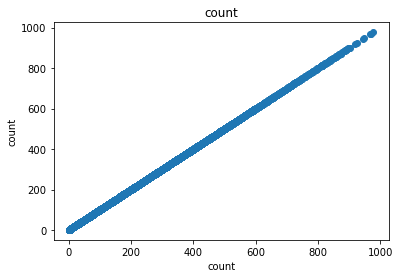

In [149]:
data = dataset.copy()
for feature in numeric_feature:
    plt.scatter(data[feature], data['count'])
    plt.title(feature)
    plt.ylabel('count')
    plt.xlabel(feature)
    plt.show()

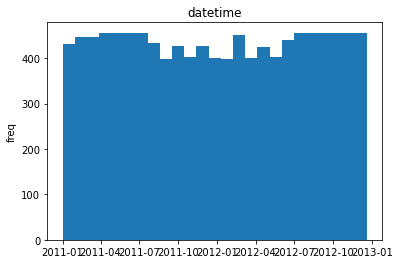

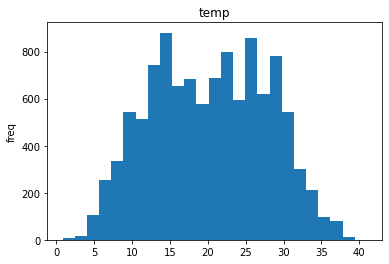

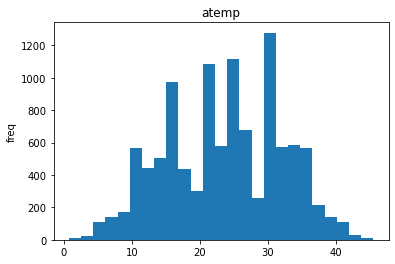

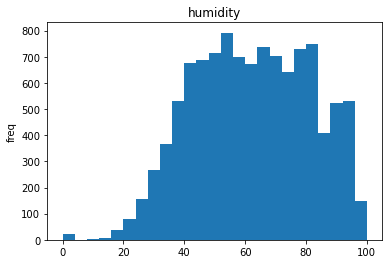

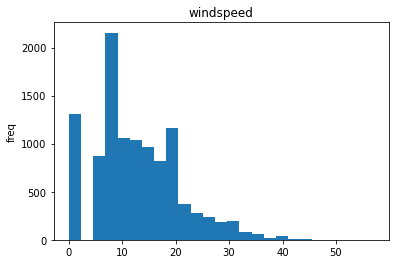

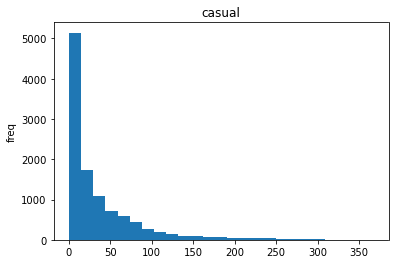

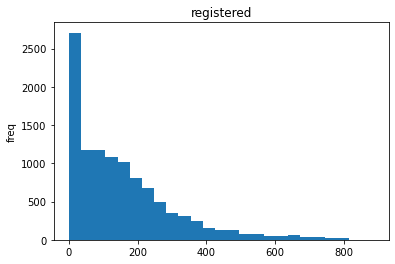

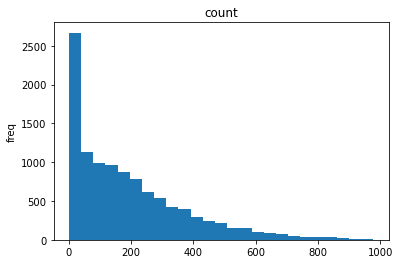

In [154]:
[feature for feature in numeric_feature if feature not in ('datetime')]
for feature in numeric_feature:
    plt.hist(x= data[feature], bins= 25)
    plt.title(feature)
    plt.ylabel('freq')
    plt.show()

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


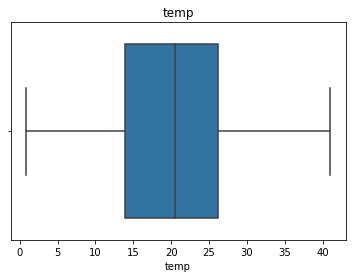

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


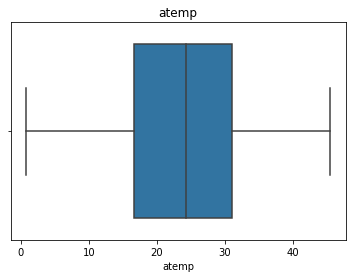

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


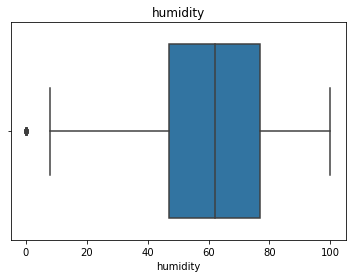

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


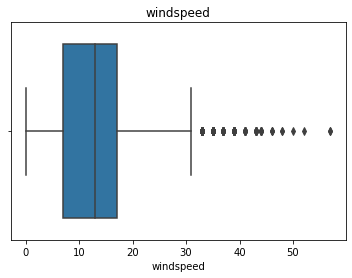

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


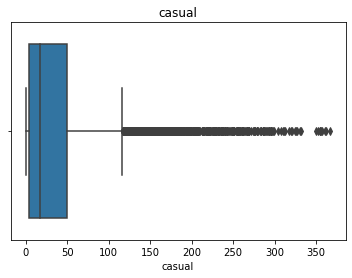

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


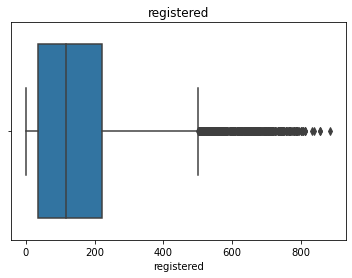

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


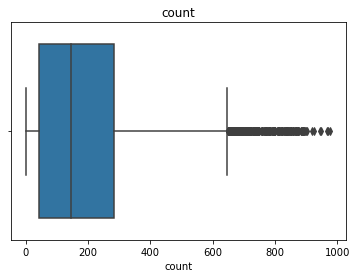

In [192]:
new_num = [feature for feature in numeric_feature if feature not in ('datetime')]
for feature in new_num:
    #data[feature].plot(kind = 'box')
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.show()

In [185]:
data[numeric_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   temp        10886 non-null  float64       
 2   atemp       10886 non-null  float64       
 3   humidity    10886 non-null  int64         
 4   windspeed   10886 non-null  float64       
 5   casual      10886 non-null  int64         
 6   registered  10886 non-null  int64         
 7   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 680.5 KB


In [161]:
for feature in numeric_feature: 
    print(feature, len(data[feature].unique()))

datetime 10886
temp 49
atemp 60
humidity 89
windspeed 28
casual 309
registered 731
count 822


<AxesSubplot:xlabel='count', ylabel='Count'>

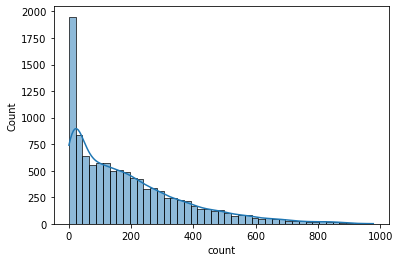

In [193]:
sns.histplot(dataset['count'],kde=True)

In [213]:
data = dataset.copy()
data.datetime.dt.hour


0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

<AxesSubplot:xlabel='season'>

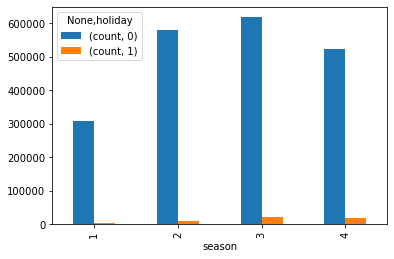

In [232]:
data.groupby(['season', 'holiday'])[['count']].sum().unstack().plot.bar()

In [235]:
def plot_by_year(agg_atr, title):
    data = dataset.copy()
    data['year'] = data.datetime.dt.year
    data['month'] = data.datetime.dt.month
    data['hour'] = data.datetime.dt.hour
    by_year = data.groupby([ agg_atr, 'year'])['count'].sum().unstack()
    return by_year.plot(kind = 'bar', figsize = (15,10), width = 0.9, title = title)



<AxesSubplot:title={'center':'2011 and 2012 and hourly bike counts'}, xlabel='hour'>

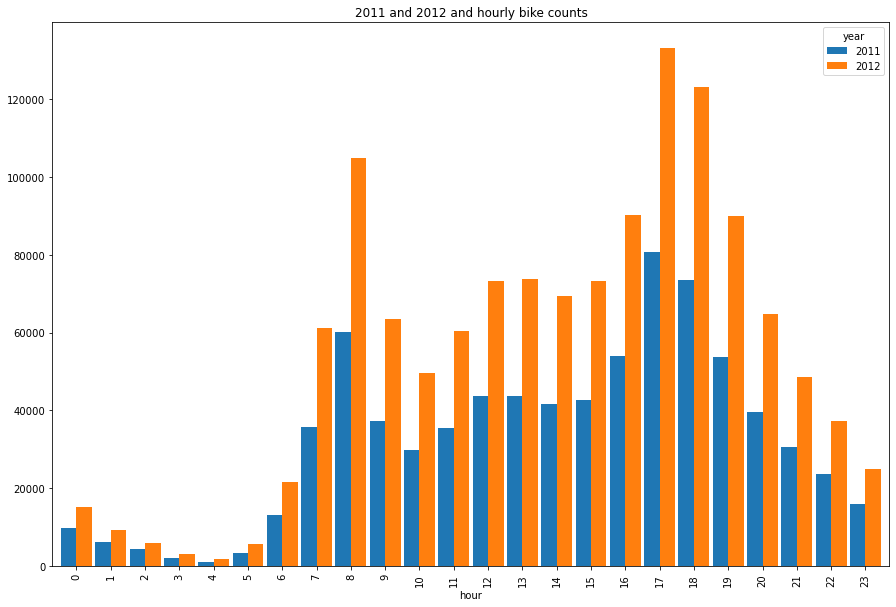

In [236]:
plot_by_year('hour', '2011 and 2012 and hourly bike counts')

<AxesSubplot:title={'center':'2011 and 2012 and hourly bike counts'}, xlabel='month'>

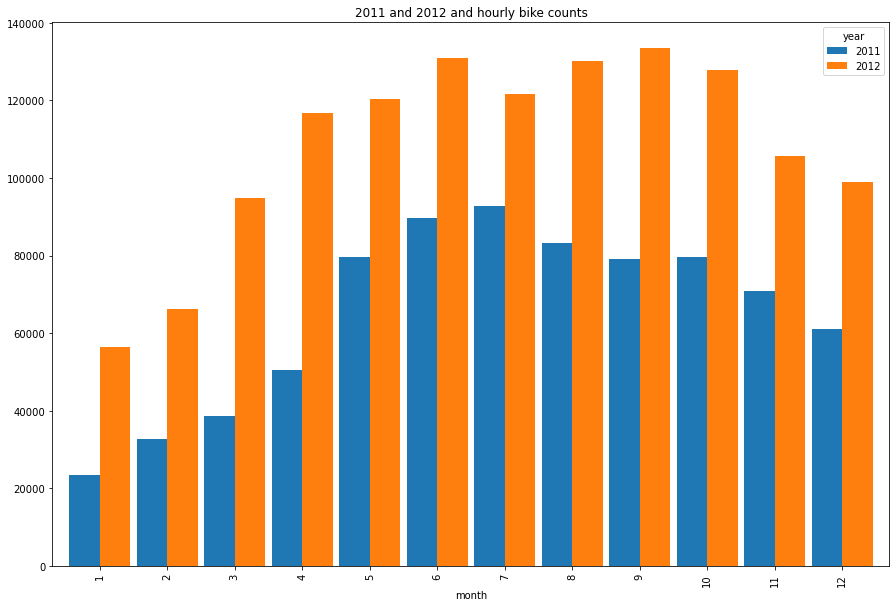

In [237]:
plot_by_year('month', '2011 and 2012 and hourly bike counts')

In [247]:
data = dataset.copy()
data['hour'] =data.datetime.dt.hour
data[ data.hour == 1 ]['count'].values

array([ 40,  17,   2,   2,   6,   4,   7,  16,  12,   1,   3,   6,   2,
         5,  20,  23,  16,   7,   3,   3,   5,   7,  18,  44,   5,   4,
         7,   7,   7,  24,  24,   7,   5,   9,   6,   8,  31,   3,   4,
         1,   4,  25,  39,   2,   4,   4,   2,   8,  18,  33,   1,  10,
         3,  12,  16,  51,   4,  32,  34,  11,  15,   2,  13,   9,  20,
        37,   4,  13,   1,  10,  15,  33,  31,  19,   7,  59, 114,  14,
         7,  10,  32,  58,  64,  33,  15,  20,  17,  20,  82,  47,  14,
        13,  12,   6,  17,  15,  22,  94,  96,  14,   4,  23,  16,  23,
        77,  93,  16,  13,  14,  17,  23,  95,  76,  31,  78,  78, 119,
        39,  15,  16,  34,  53, 113,  10,  14,  12,  25,  20,  75, 102,
        25,  13,  17,  12,  16,  17,  19,  67,  73,  12,  14,  17,  26,
        23,  77,  73,  10,  16,  14,  24,  20,  21,  32,  74,  75,  54,
         5,   4,   8,  83,  88,  12,  10,   8,  20,  26,  80,  79,  10,
        58,  24,   6,   9,  11,  22,  28,  65,  78,  34,  11,  1

In [249]:
data  = dataset.copy()
data['hour'] = data.datetime.dt.hour

In [253]:
data[['hour']].values

array([[ 0],
       [ 1],
       [ 2],
       ...,
       [21],
       [22],
       [23]], dtype=int64)

In [318]:
def boxplot_count(dd, message):   
    dd['hour'] = data.datetime.dt.hour # extratcing the hour

    hours = {}
    for hour in range(24):
        hours[hour] = dd[dd.hour == hour]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" +message)    
    plt.boxplot([hours[hour] for hour in range(24)])
    plt.show()


C:\Users\431170~1\AppData\Local\Temp/ipykernel_5444/4220492670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['hour'] = data.datetime.dt.hour # extratcing the hour


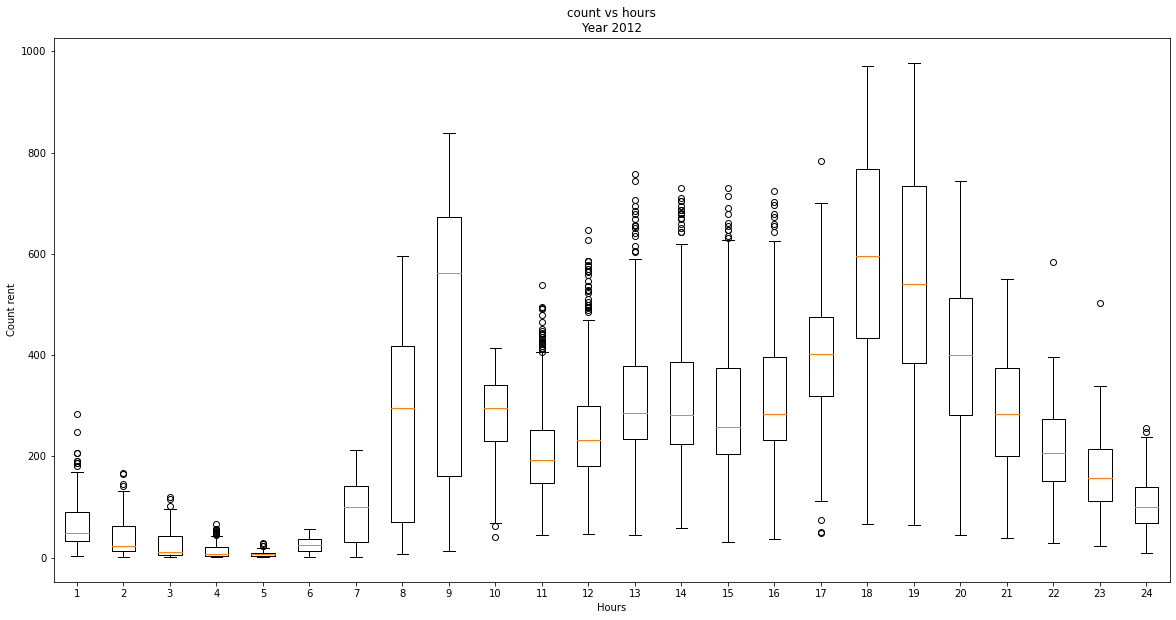

In [319]:
data = dataset.copy()
boxplot_count(data[data.datetime.dt.year ==2012], 'Year 2012')

In [328]:
hours = {}
data = dataset.copy()
for hour in range(24):
     hours[hour] = dd[dd.hour == hour][['count']].values
    
for hour in range(24):
    print(type(hours[hour]))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\Users\431170~1\AppData\Local\Temp/ipykernel_5444/4220492670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['hour'] = data.datetime.dt.hour # extratcing the hour


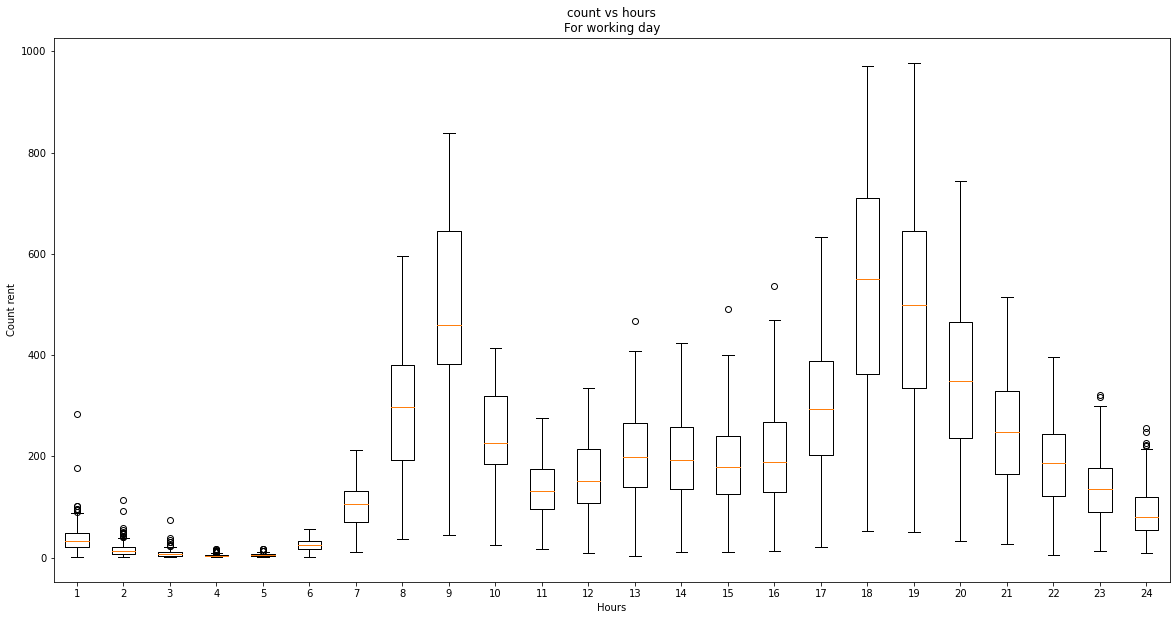

C:\Users\431170~1\AppData\Local\Temp/ipykernel_5444/4220492670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['hour'] = data.datetime.dt.hour # extratcing the hour


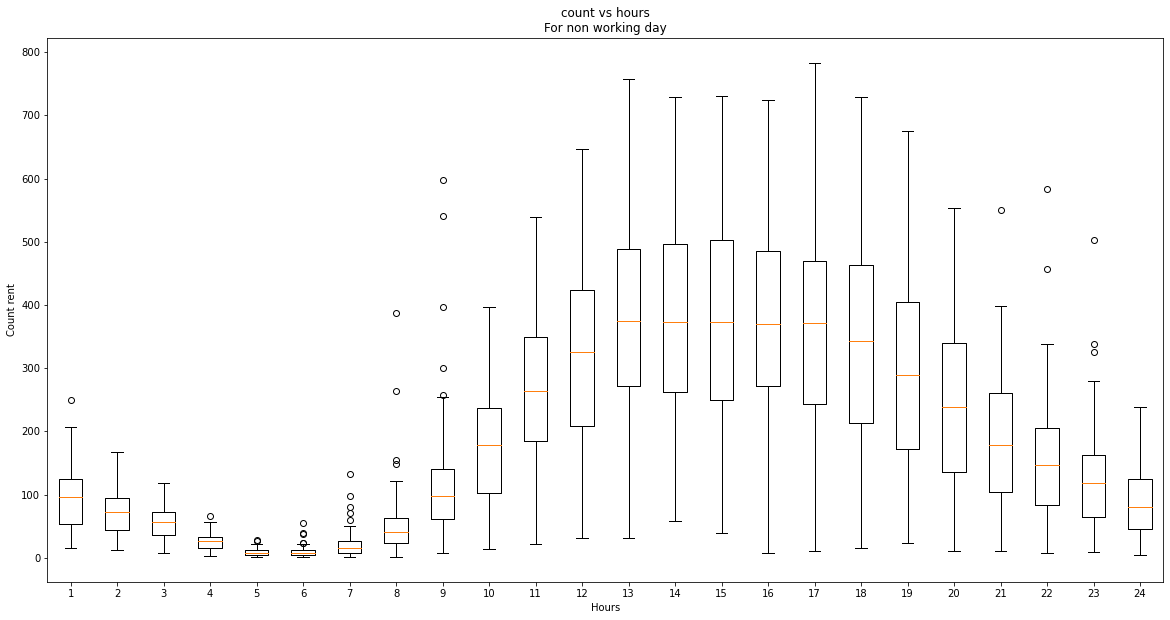

In [330]:
boxplot_count(data[data.workingday ==1], 'For working day')
boxplot_count(data[data.workingday ==0], 'For non working day')

In [358]:
def hour_cat(hour):
    if hour < 6 and hour >0:
        return 1
    elif 6<hour<12:
        return 2
    elif 12<hour<18:
        return 3
    else:
        return 4

In [336]:
data = dataset.copy()
data['hour'] = data.datetime.dt.hour.apply(hour_cat)

In [338]:
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year day month  hour  
0        81        0.0       3          13     16  2011  01    01     4  
1        80        0.0       8          32     40  2011  01    01     1  
2        80        0.0       5          27     32  2011  01    01     1  
3        75        0.0       3          10     13  2011  01    01     1  
4        75        0.0       0           1      1  2011  01    01     1

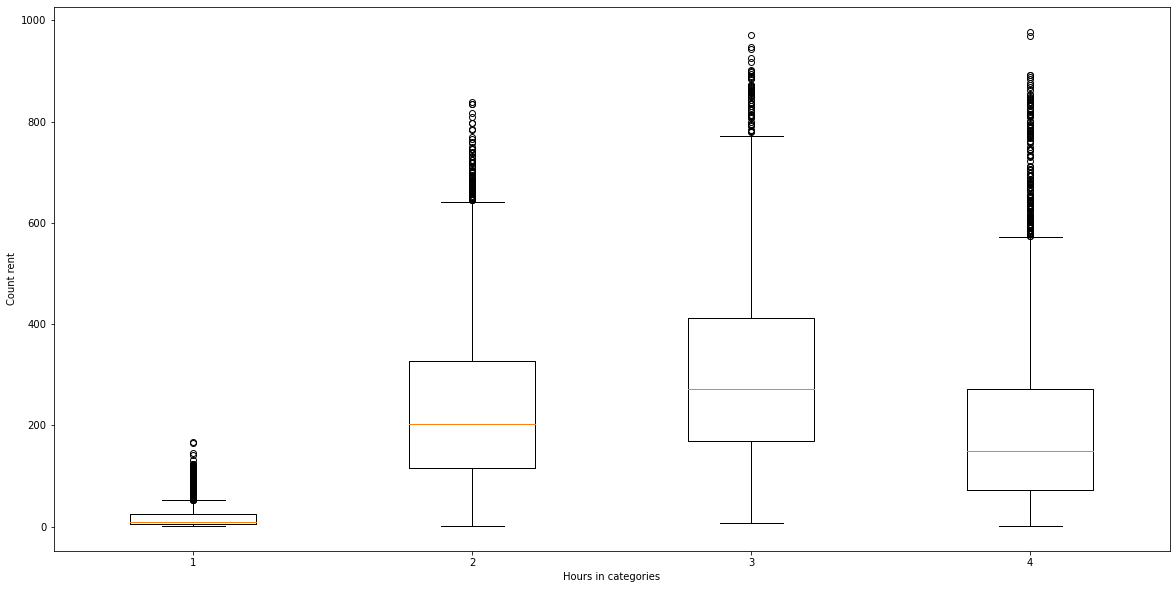

In [372]:
valeu_n = {}
data = dataset.copy()
data['hour'] = data.datetime.dt.hour.apply(hour_cat)
for hour in range(1,5):
    new_data =  data[data['hour']==hour]
    valeu_n[hour] = new_data['count'].values
    
plt.figure(figsize=(20,10))
plt.ylabel("Count rent")
plt.xlabel("Hours in categories")
plt.boxplot([valeu_n[hour] for hour in range(1,5)])
plt.show()
    

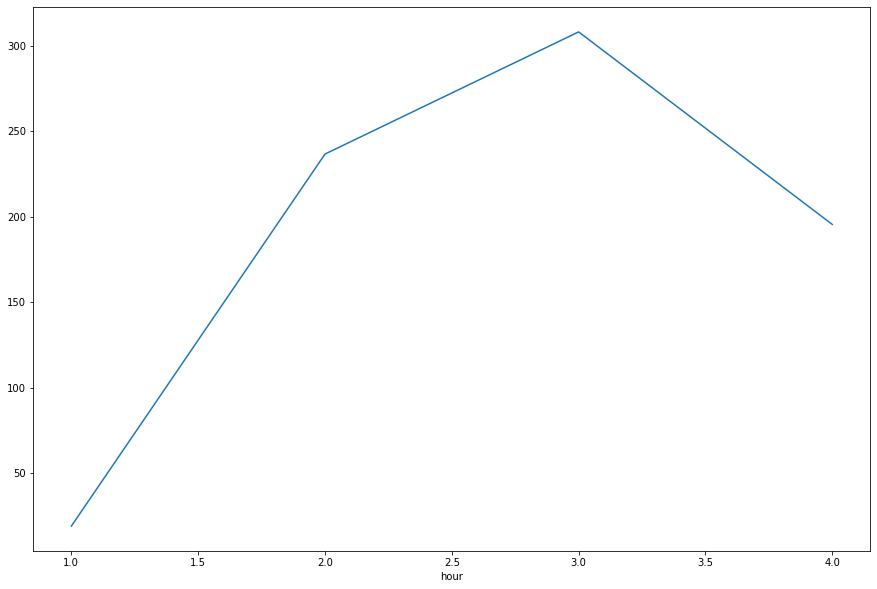

In [423]:
data = dataset.copy()

data['hour'] = data.datetime.dt.hour.apply(hour_cat)


data.groupby(['hour'])['count'].mean().plot(kind = 'line', figsize = (15,10))

plt.show()

    
    
